<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/country_gdp_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# Step 1: Load the dataset
gdp_data = pd.read_csv('gdp.csv')
gdp_data = gdp_data[~gdp_data['Country Code'].isna()]
gdp_data.drop(columns=['Country Code'], inplace=True)
gdp_data.drop(columns=['Series Code'], inplace=True)
gdp_data.set_index('Country Name', inplace=True)

In [25]:
gdp_data.head()

,Series Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
Country Name,,,,,,,,,,,,,,,,,
Afghanistan,"Population, total",19542982,19688632,21000256,22645130,23553551,24411191,25442944,25903301,26427199,27385307,28189672,29249157,30466479,31541209,32716210,33753499
Albania,"Population, total",3089027,3060173,3051010,3039616,3026939,3011487,2992547,2970017,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703
Algeria,"Population, total",30774621,31200985,31624696,32055883,32510186,32956690,33435080,33983827,34569592,35196037,35856344,36543541,37260563,38000626,38760168,39543154
American Samoa,"Population, total",58230,58324,58177,57941,57626,57254,56837,56383,55891,55366,54849,54310,53691,52995,52217,51368
Andorra,"Population, total",66097,67820,70849,73907,76933,79826,80221,78168,76055,73852,71519,70567,71013,71367,71621,71746


In [26]:
gdp_data.columns

Index(['Series Name', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]',
       '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]',
       '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]'],
      dtype='object')

In [27]:
gdp_data = gdp_data[['Series Name',
                     '2000 [YR2000]',
                     '2001 [YR2001]',
                     '2002 [YR2002]',
                     '2003 [YR2003]',
                     '2004 [YR2004]',
                     '2005 [YR2005]',
                     '2006 [YR2006]',
                     '2007 [YR2007]',
                     '2008 [YR2008]',
                     '2009 [YR2009]',
                     '2010 [YR2010]',
                     '2011 [YR2011]',
                     '2012 [YR2012]',
                     '2013 [YR2013]',
                     '2014 [YR2014]',
                     '2015 [YR2015]'
                    ]]
for col in gdp_data.columns:
    if col == 'Series Name':
        continue
    gdp_data[col] = gdp_data[col].astype(str).fillna('0')
    gdp_data[col] = gdp_data[col].apply(lambda x: x.replace('', '0'))
    gdp_data[col] = gdp_data[col].apply(lambda x: x.replace('0-', ''))
    gdp_data[col] = gdp_data[col].apply(lambda x: x.replace('..', '.'))
    gdp_data[col] = gdp_data[col].apply(lambda x: x.replace('0.0.0', '0'))
    gdp_data[col] = gdp_data[col].apply(lambda x: x.split(".")[0] + "." + x.split(".")[1] if "." in x else x)
    gdp_data[col] = gdp_data[col].astype(float)
gdp_data.fillna(gdp_data.iloc[:, 1:].mean(axis=1), inplace=True)
gdp_data.fillna(0, inplace=True)
gdp_data.head()

,Series Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
Country Name,,,,,,,,,,,,,,,,,
Afghanistan,"Population, total",1.090504e+15,1.090608e+15,2.010000e+15,2.020604e+15,2.030505e+15,2.040401e+15,2.050404e+15,2.050900e+15,2.060402e+15,2.070308e+15,2.080108e+15,2.090204e+15,3.000406e+15,3.010504e+15,3.020701e+15,3.030705e+15
Albania,"Population, total",3.000809e+13,3.000600e+13,3.000501e+13,3.000309e+13,3.000206e+13,3.000101e+13,2.090902e+13,2.090700e+13,2.090407e+13,2.090207e+13,2.090103e+13,2.090005e+13,2.090000e+13,2.080905e+13,2.080809e+13,2.080800e+13
Algeria,"Population, total",3.000707e+15,3.010200e+15,3.010602e+15,3.020005e+15,3.020501e+15,3.020905e+15,3.030403e+15,3.030908e+15,3.040506e+15,3.050109e+15,3.050805e+15,3.060504e+15,3.070206e+15,3.080000e+15,3.080706e+15,3.090504e+15
American Samoa,"Population, total",5.080203e+09,5.080302e+09,5.080107e+09,5.070904e+09,5.070602e+09,5.070205e+09,5.060803e+09,5.060308e+09,5.050809e+09,5.050306e+09,5.040804e+09,5.040301e+09,5.030609e+09,5.020909e+09,5.020201e+09,5.010306e+09
Andorra,"Population, total",6.060009e+09,6.070802e+09,7.000804e+09,7.030900e+09,7.060903e+09,7.090802e+09,8.000202e+09,7.080106e+09,7.060005e+09,7.030805e+09,7.010501e+09,7.000506e+09,7.010001e+09,7.010306e+09,7.010602e+09,7.010704e+09


In [ ]:
# GDP (current US$)
# GDP growth (annual %)

In [33]:
gdp_data.dtypes

,0
Series Name,object
2000 [YR2000],float64
2001 [YR2001],float64
2002 [YR2002],float64
2003 [YR2003],float64
2004 [YR2004],float64
2005 [YR2005],float64
2006 [YR2006],float64
2007 [YR2007],float64
2008 [YR2008],float64


In [32]:
gdp_data.iloc[: , 1:]

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
Country Name,,,,,,,,,,,,,,,,
Afghanistan,1.090504e+15,1.090608e+15,2.010000e+15,2.020604e+15,2.030505e+15,2.040401e+15,2.050404e+15,2.050900e+15,2.060402e+15,2.070308e+15,2.080108e+15,2.090204e+15,3.000406e+15,3.010504e+15,3.020701e+15,3.030705e+15
Albania,3.000809e+13,3.000600e+13,3.000501e+13,3.000309e+13,3.000206e+13,3.000101e+13,2.090902e+13,2.090700e+13,2.090407e+13,2.090207e+13,2.090103e+13,2.090005e+13,2.090000e+13,2.080905e+13,2.080809e+13,2.080800e+13
Algeria,3.000707e+15,3.010200e+15,3.010602e+15,3.020005e+15,3.020501e+15,3.020905e+15,3.030403e+15,3.030908e+15,3.040506e+15,3.050109e+15,3.050805e+15,3.060504e+15,3.070206e+15,3.080000e+15,3.080706e+15,3.090504e+15
American Samoa,5.080203e+09,5.080302e+09,5.080107e+09,5.070904e+09,5.070602e+09,5.070205e+09,5.060803e+09,5.060308e+09,5.050809e+09,5.050306e+09,5.040804e+09,5.040301e+09,5.030609e+09,5.020909e+09,5.020201e+09,5.010306e+09
Andorra,6.060009e+09,6.070802e+09,7.000804e+09,7.030900e+09,7.060903e+09,7.090802e+09,8.000202e+09,7.080106e+09,7.060005e+09,7.030805e+09,7.010501e+09,7.000506e+09,7.010001e+09,7.010306e+09,7.010602e+09,7.010704e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
West Bank and Gaza,2.007091e+01,1.002020e+01,5.007001e+01,4.004000e+01,3.000000e+01,4.001001e+01,3.008040e+01,1.008051e+01,9.008081e+01,2.007050e+01,3.007041e+01,2.008071e+01,2.007071e+01,1.007020e+01,1.007030e+01,1.004030e+01
"Yemen, Rep.",4.005081e+01,1.010090e+03,1.020020e+03,1.000080e+03,1.020050e+03,1.010080e+03,1.000080e+03,7.009001e+01,1.080091e+03,5.004001e+01,1.010011e+03,1.090050e+03,9.008081e+01,1.000091e+03,8.001000e+01,0.000000e+00


In [42]:
gdp_data = gdp_data.iloc[: , 1:]
gdp_data = gdp_data.round(4)
gdp_data = gdp_data.replace([np.inf, -np.inf], np.nan)
gdp_data.fillna(0, inplace=True)

In [43]:
# Step 3: Standardize the data
scaler = StandardScaler()
gdp_scaled = scaler.fit_transform(gdp_data)

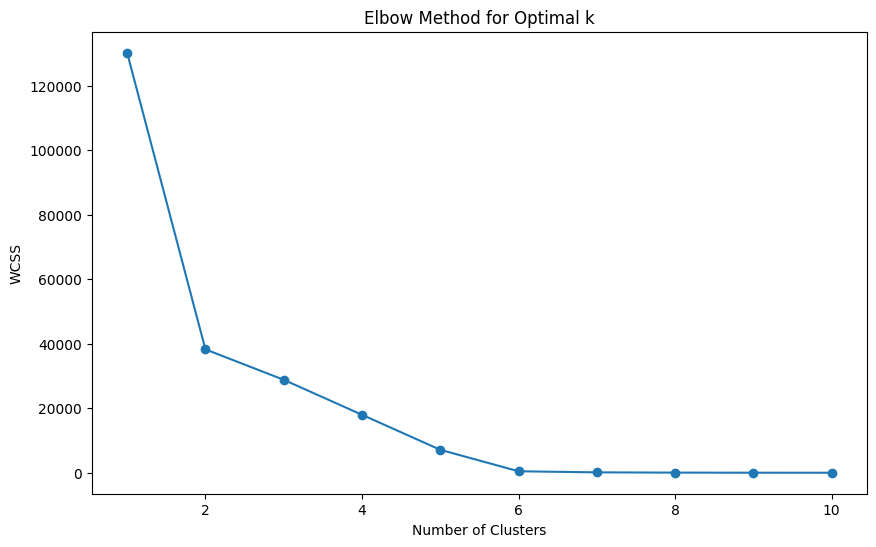

In [44]:
# Step 4: Determine the optimal number of clusters (Elbow Method)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(gdp_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [49]:
# Step 5: Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=6, random_state=42)
gdp_data['cluster'] = kmeans.fit_predict(gdp_scaled)

In [55]:
gdp_data.groupby('cluster').mean()

,2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
cluster,,,,,,,,,,,,
0,4.385536e+22,4.879334e+22,5.732775e+22,6.917060e+22,7.180543e+22,2.768926e+47,7.584864e+22,8.197420e+22,8.401891e+22,8.713424e+22,8.911123e+22,8.503241e+22
1,1.020402e+27,1.030238e+27,1.037005e+27,1.040504e+27,1.040770e+27,1.040473e+27,1.050104e+27,1.050674e+27,1.060437e+27,1.066971e+27,1.070737e+27,1.080304e+27
2,5.070203e+25,6.050406e+25,7.060406e+25,9.000008e+25,1.000100e+27,1.010003e+27,1.020302e+27,1.030701e+27,1.050107e+27,1.060204e+27,1.070404e+27,1.080102e+27
3,1.080000e-02,6.020000e-02,1.005060e+01,2.005010e+01,4.000060e+01,9.001070e+71,1.001080e+01,3.004010e+01,2.008000e+01,1.004070e+01,1.000040e+01,2.000000e-02
4,0.000000e+00,0.000000e+00,0.000000e+00,7.050000e-02,1.020000e-02,2.010000e-02,1.030000e-02,8.007051e+51,2.000000e-04,0.000000e+00,0.000000e+00,0.000000e+00
5,1.090507e+25,2.020855e+25,2.070254e+25,3.040300e+25,4.030454e+25,4.550001e+25,5.540404e+25,6.560652e+25,8.025154e+25,9.030802e+25,1.000306e+27,1.005407e+27


In [56]:
# Step 6: Visualize clusters
gdp_cluster_summary = gdp_data.groupby('cluster').mean()
gdp_cluster_summary
# Step 7: Save the clustered data
#gdp_filter.to_csv('clustered_gdp_data.csv')

,2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
cluster,,,,,,,,,,,,
0,4.385536e+22,4.879334e+22,5.732775e+22,6.917060e+22,7.180543e+22,2.768926e+47,7.584864e+22,8.197420e+22,8.401891e+22,8.713424e+22,8.911123e+22,8.503241e+22
1,1.020402e+27,1.030238e+27,1.037005e+27,1.040504e+27,1.040770e+27,1.040473e+27,1.050104e+27,1.050674e+27,1.060437e+27,1.066971e+27,1.070737e+27,1.080304e+27
2,5.070203e+25,6.050406e+25,7.060406e+25,9.000008e+25,1.000100e+27,1.010003e+27,1.020302e+27,1.030701e+27,1.050107e+27,1.060204e+27,1.070404e+27,1.080102e+27
3,1.080000e-02,6.020000e-02,1.005060e+01,2.005010e+01,4.000060e+01,9.001070e+71,1.001080e+01,3.004010e+01,2.008000e+01,1.004070e+01,1.000040e+01,2.000000e-02
4,0.000000e+00,0.000000e+00,0.000000e+00,7.050000e-02,1.020000e-02,2.010000e-02,1.030000e-02,8.007051e+51,2.000000e-04,0.000000e+00,0.000000e+00,0.000000e+00
5,1.090507e+25,2.020855e+25,2.070254e+25,3.040300e+25,4.030454e+25,4.550001e+25,5.540404e+25,6.560652e+25,8.025154e+25,9.030802e+25,1.000306e+27,1.005407e+27


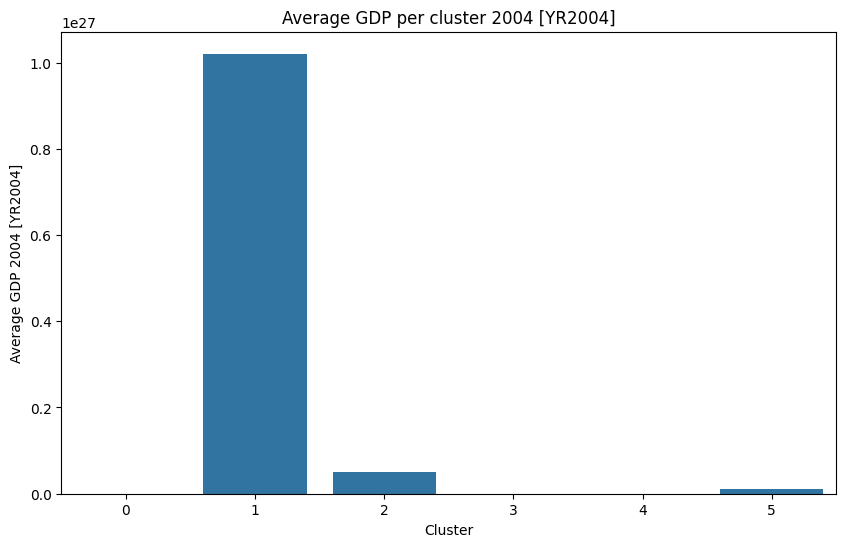

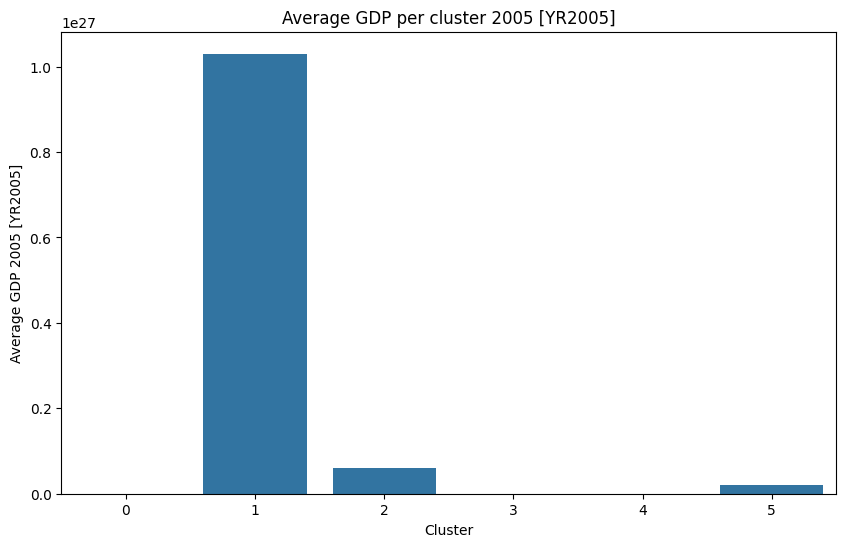

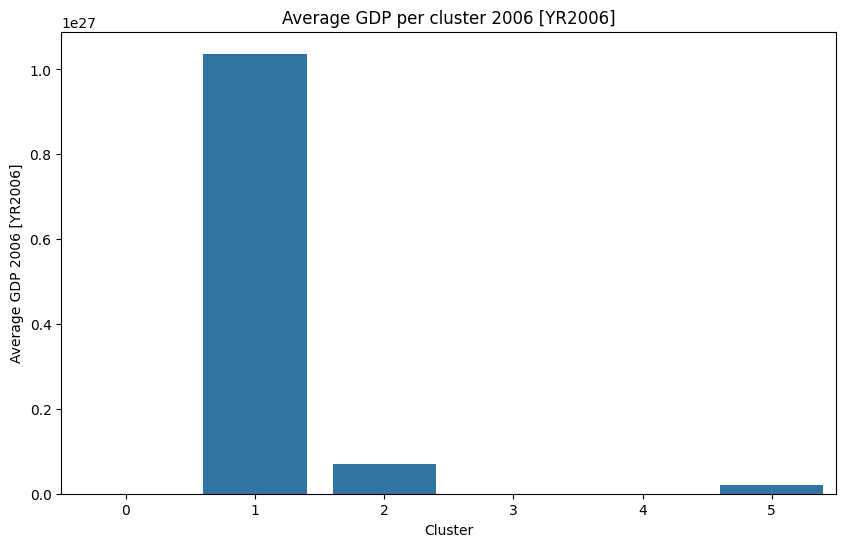

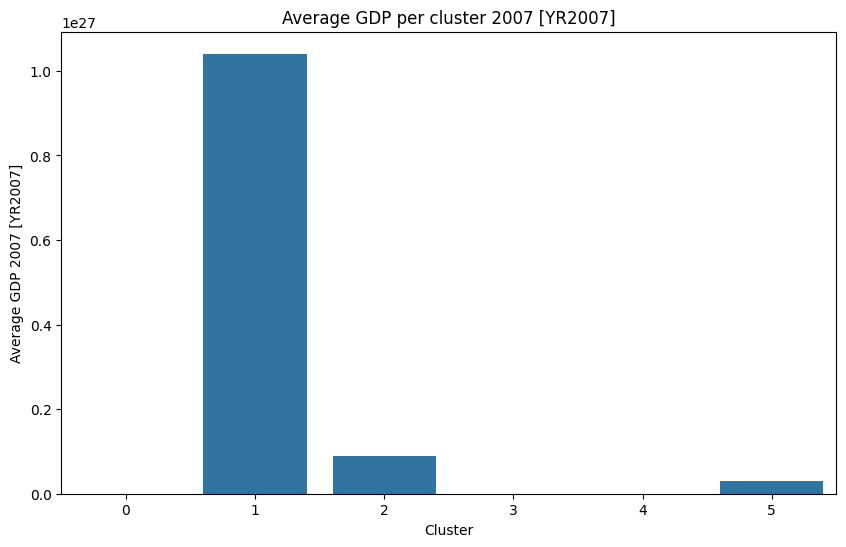

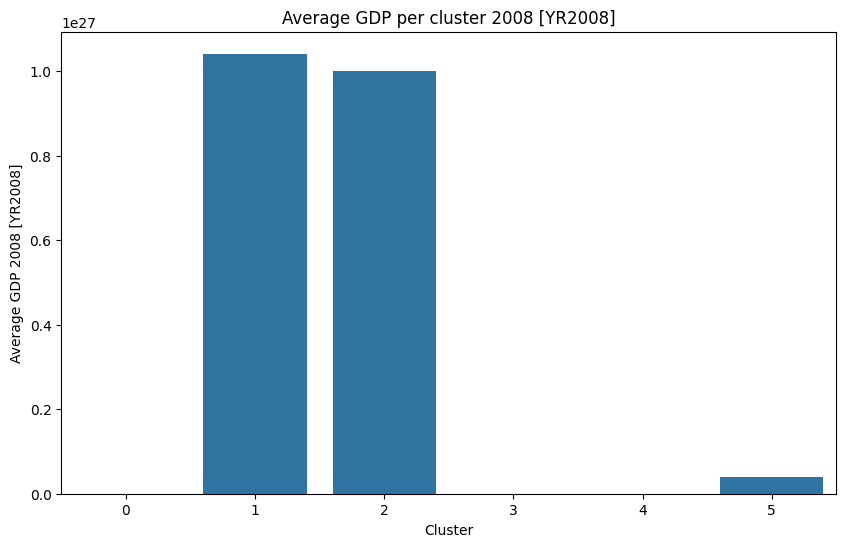

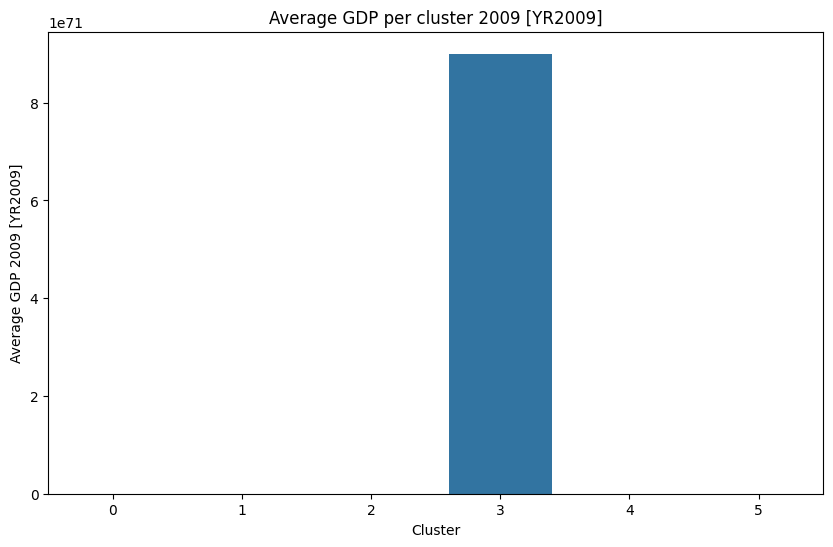

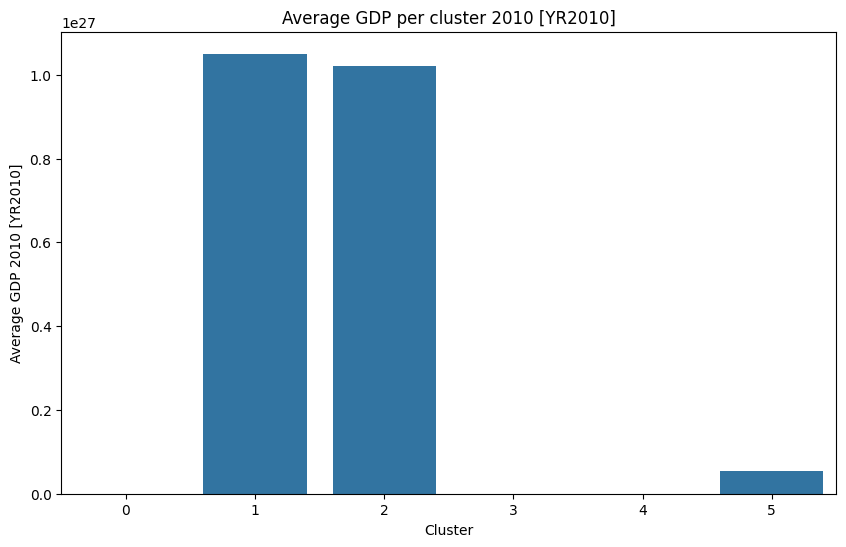

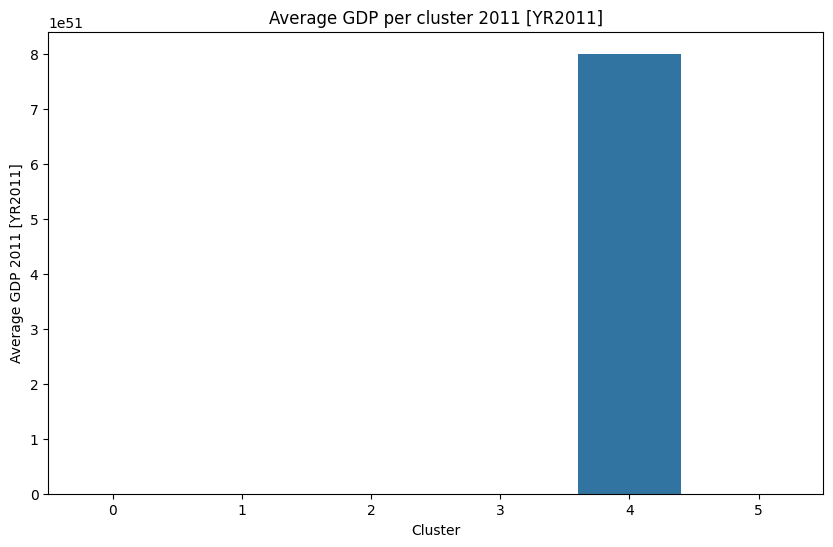

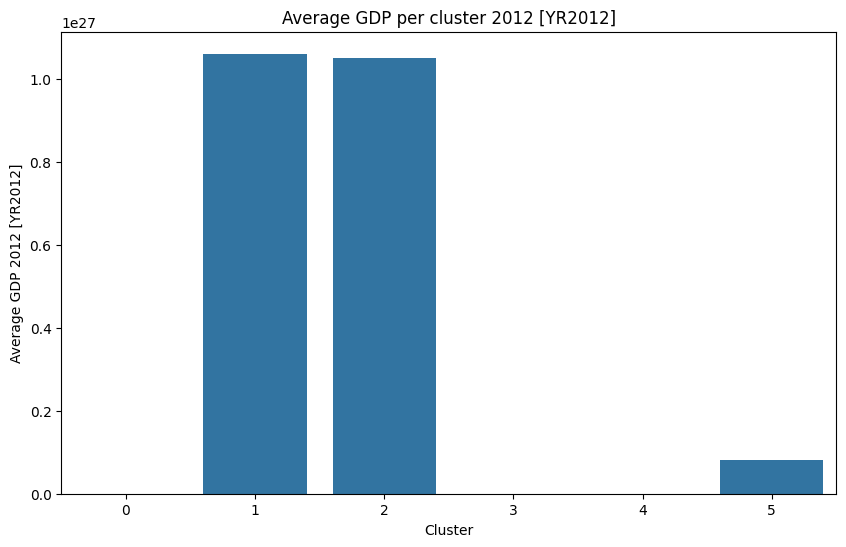

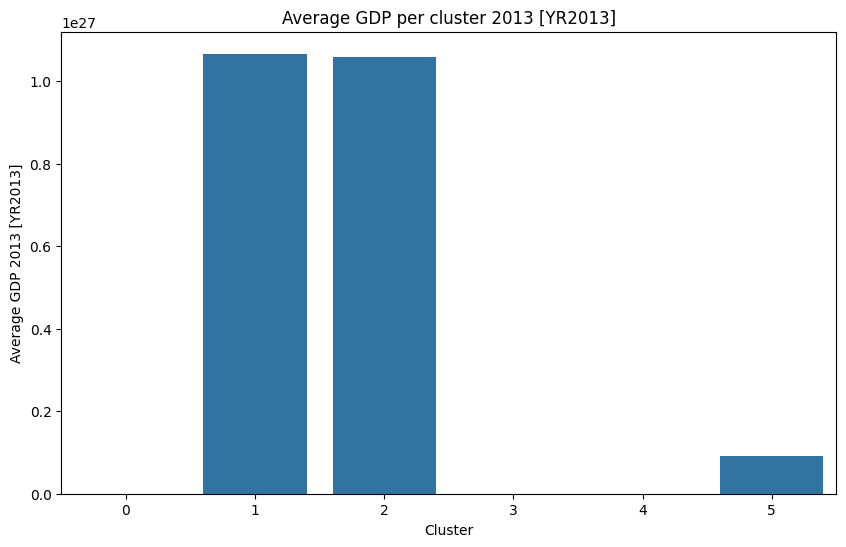

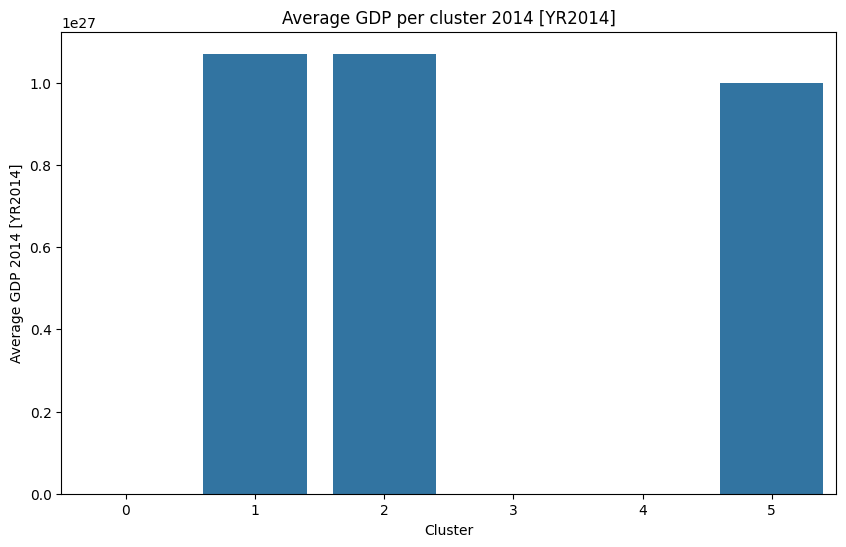

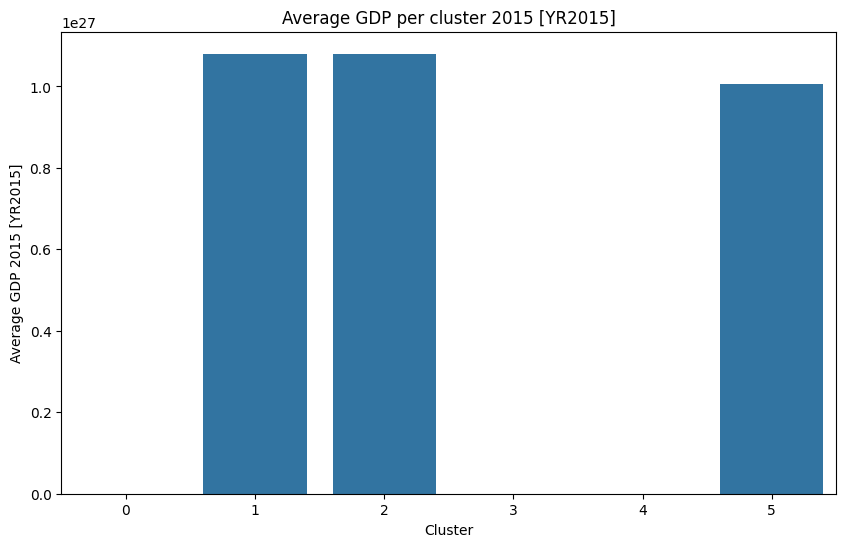

In [57]:
for col in gdp_cluster_summary.columns:
    gdp_cluster_summary[col] = gdp_cluster_summary[col].round(2)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=gdp_cluster_summary.index, y=gdp_cluster_summary[col])
    plt.title(f'Average GDP per cluster {col}')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average GDP {col}')
    plt.show(block = False)

In [59]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.4 MB/s eta 0:00:00


In [60]:
from sklearn_extra.cluster import KMedoids

In [74]:
kmedoids = KMedoids(n_clusters= 2, random_state=42)
kmedoids.fit(gdp_scaled)

KMedoids(n_clusters=2, random_state=42)

In [67]:
len(kmedoids.labels_), len(gdp_scaled), len( gdp_data.mean(axis = 1))

(10850, 10850, 10850)

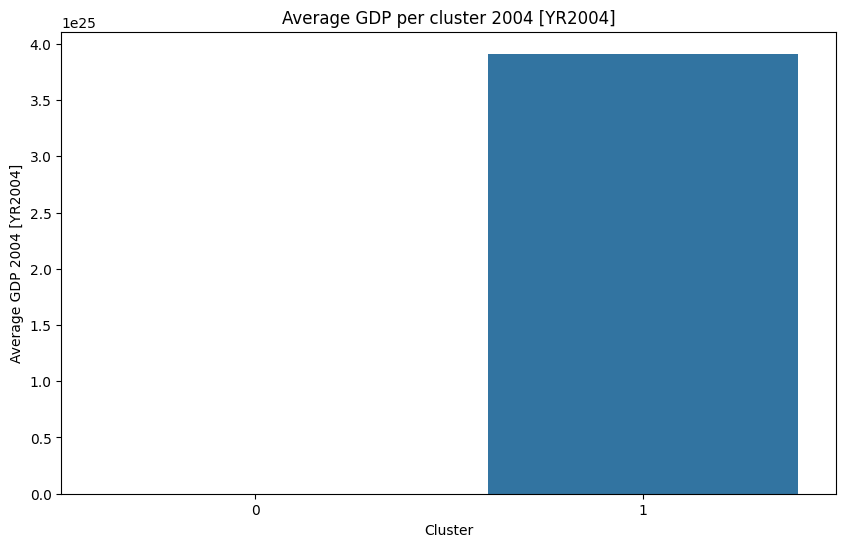

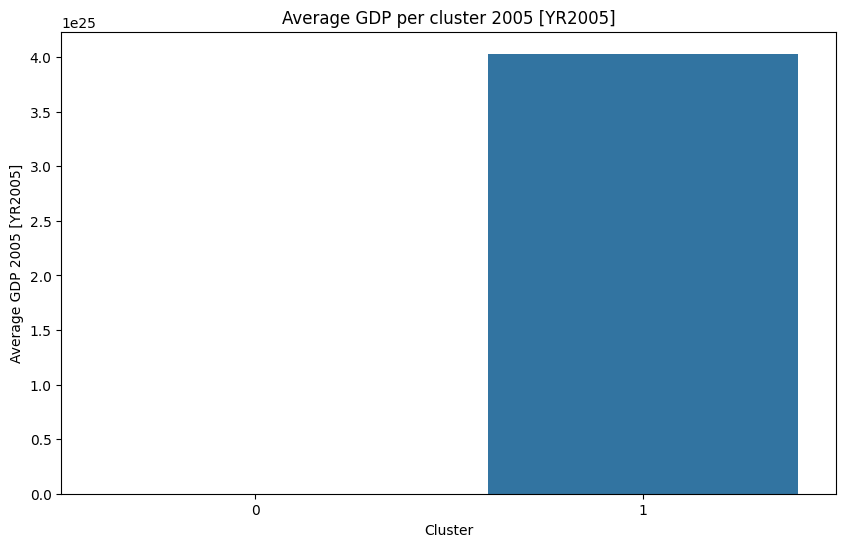

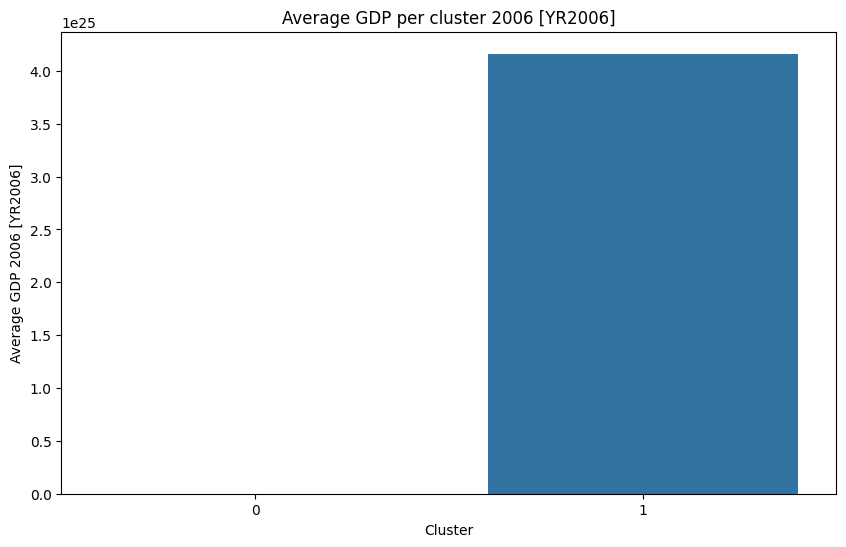

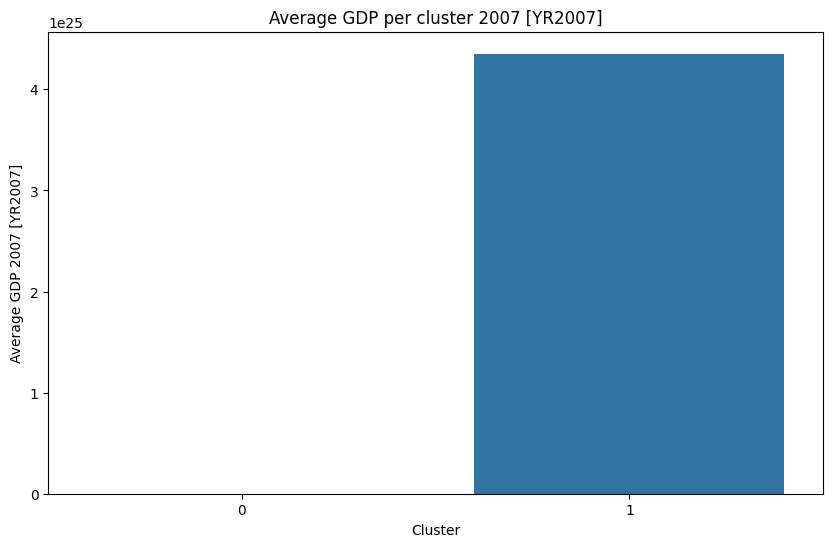

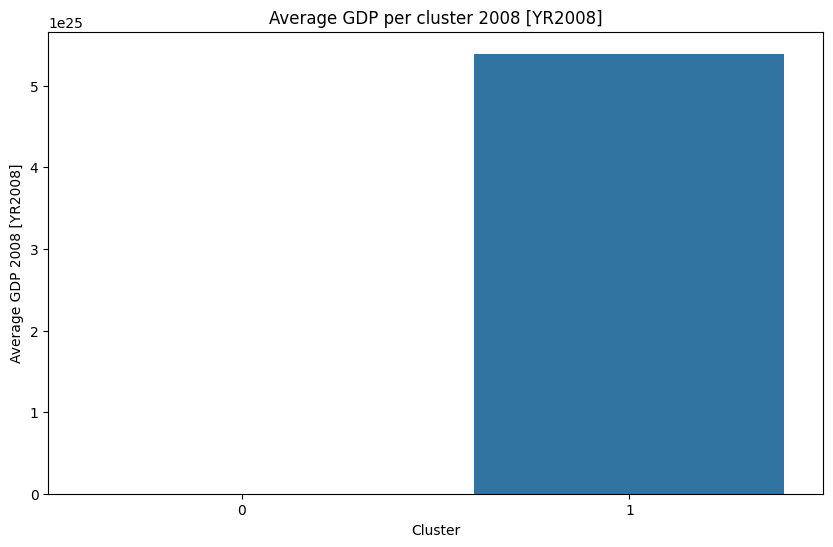

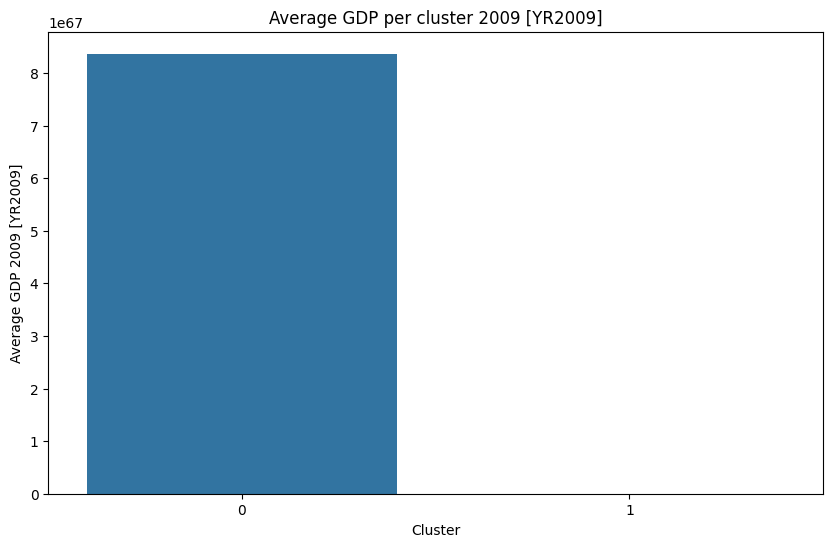

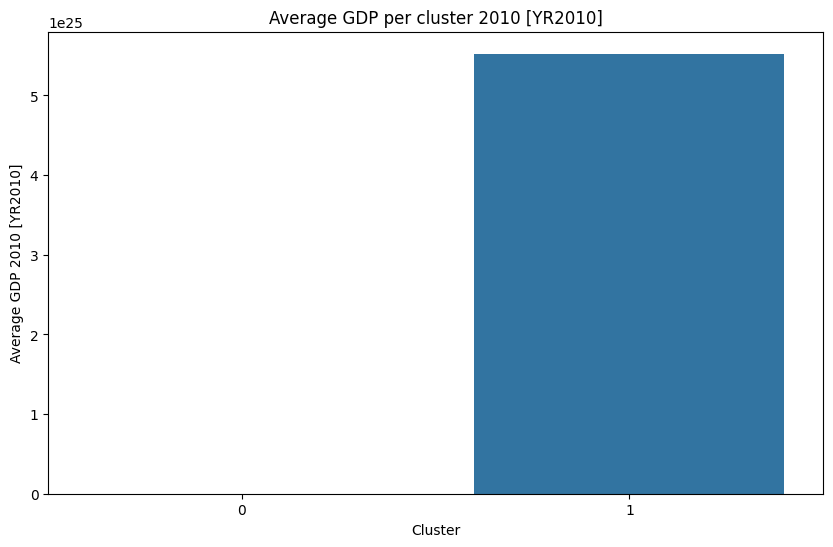

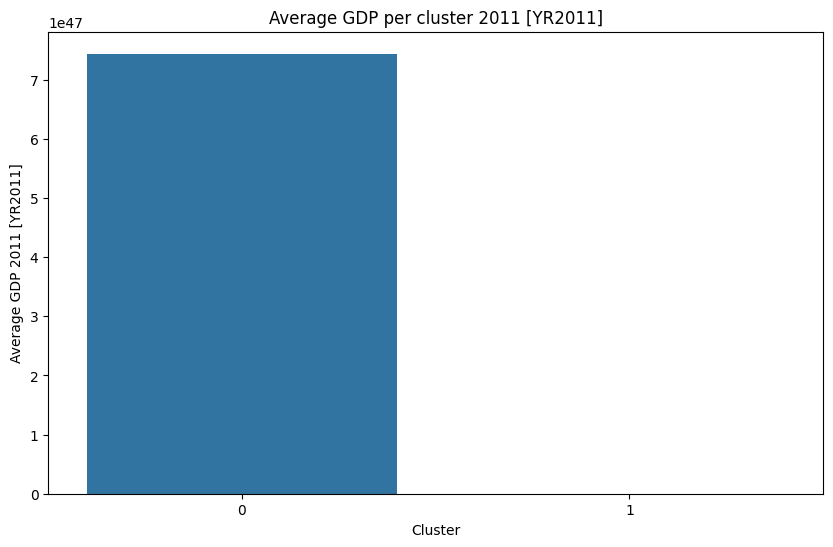

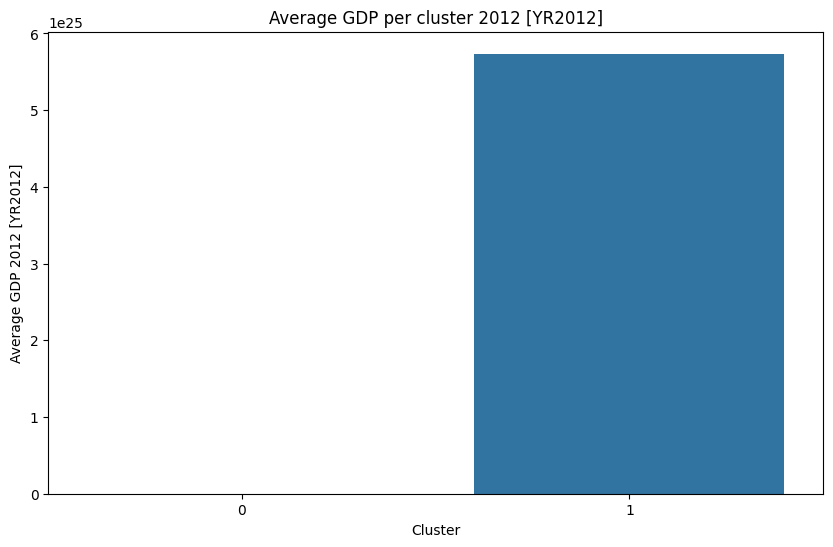

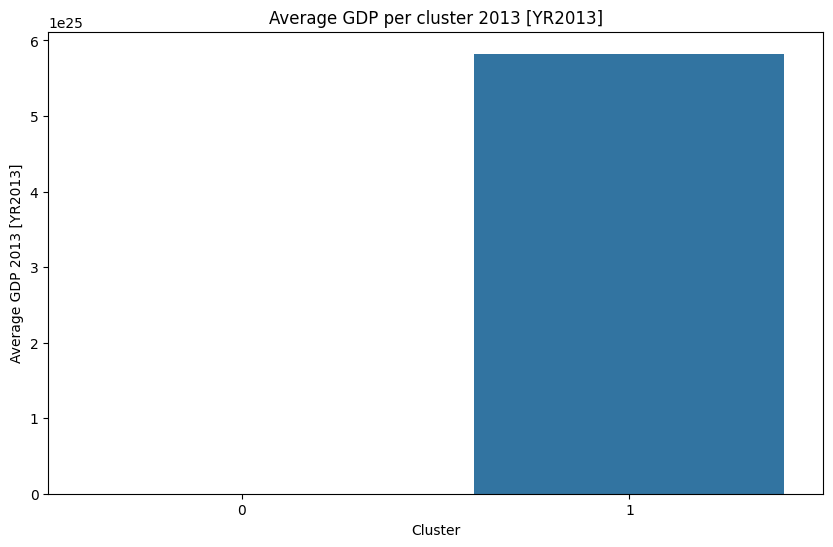

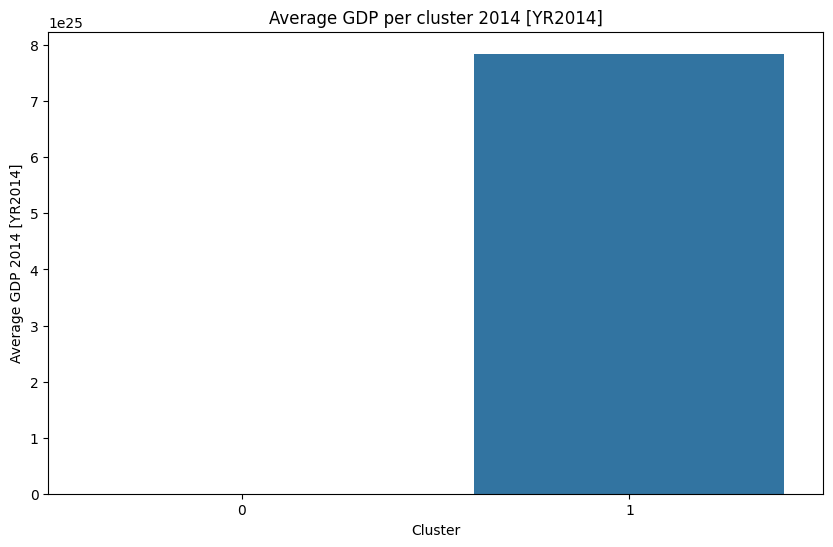

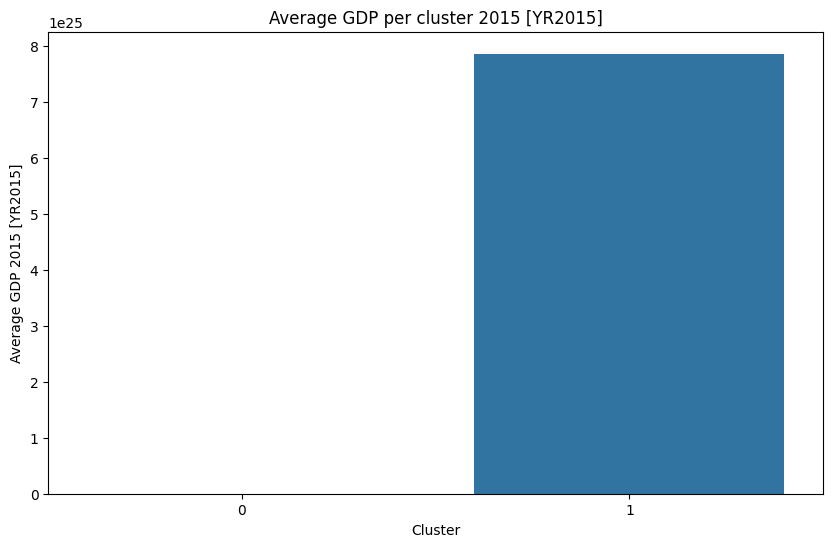

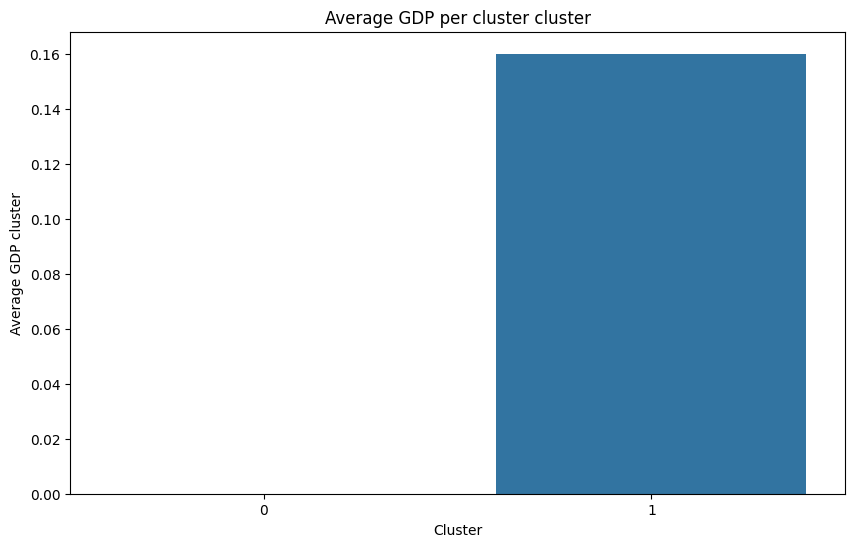

In [75]:
gdp_data['kmedoids_cluster'] = kmedoids.labels_
gdp_kmedoids_cluster_summary = gdp_data.groupby('kmedoids_cluster').mean()
gdp_kmedoids_cluster_summary
for col in gdp_kmedoids_cluster_summary.columns:
    gdp_kmedoids_cluster_summary[col] = gdp_kmedoids_cluster_summary[col].round(2)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=gdp_kmedoids_cluster_summary.index, y=gdp_kmedoids_cluster_summary[col])
    plt.title(f'Average GDP per cluster {col}')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average GDP {col}')
    plt.show(block = False)

In [70]:
gdp_data

,2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],cluster,kmedoids_cluster
Country Name,,,,,,,,,,,,,,
Afghanistan,2.030505e+15,2.040401e+15,2.050404e+15,2.050900e+15,2.060402e+15,2.070308e+15,2.080108e+15,2.090204e+15,3.000406e+15,3.010504e+15,3.020701e+15,3.030705e+15,0,0
Albania,3.000206e+13,3.000101e+13,2.090902e+13,2.090700e+13,2.090407e+13,2.090207e+13,2.090103e+13,2.090005e+13,2.090000e+13,2.080905e+13,2.080809e+13,2.080800e+13,0,0
Algeria,3.020501e+15,3.020905e+15,3.030403e+15,3.030908e+15,3.040506e+15,3.050109e+15,3.050805e+15,3.060504e+15,3.070206e+15,3.080000e+15,3.080706e+15,3.090504e+15,0,0
American Samoa,5.070602e+09,5.070205e+09,5.060803e+09,5.060308e+09,5.050809e+09,5.050306e+09,5.040804e+09,5.040301e+09,5.030609e+09,5.020909e+09,5.020201e+09,5.010306e+09,0,0
Andorra,7.060903e+09,7.090802e+09,8.000202e+09,7.080106e+09,7.060005e+09,7.030805e+09,7.010501e+09,7.000506e+09,7.010001e+09,7.010306e+09,7.010602e+09,7.010704e+09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0
West Bank and Gaza,3.000000e+01,4.001000e+01,3.008040e+01,1.008050e+01,9.008080e+01,2.007050e+01,3.007040e+01,2.008070e+01,2.007070e+01,1.007020e+01,1.007030e+01,1.004030e+01,0,0
"Yemen, Rep.",1.020050e+03,1.010080e+03,1.000080e+03,7.009000e+01,1.080091e+03,5.004000e+01,1.010011e+03,1.090050e+03,9.008080e+01,1.000091e+03,8.001000e+01,0.000000e+00,0,0


ValueError: x and y must be the same size

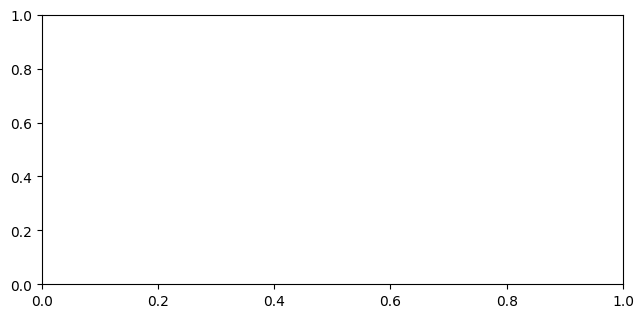

In [66]:
plt.figure(figsize=(7.5, 3.5))
plt.scatter(gdp_data, gdp_data.mean(axis = 1), c=kmedoids.labels_, cmap='viridis')
plt.scatter(kmedoids.cluster_centers_[:, 0],
kmedoids.cluster_centers_[:, 1], marker='x', color='red')
plt.show()

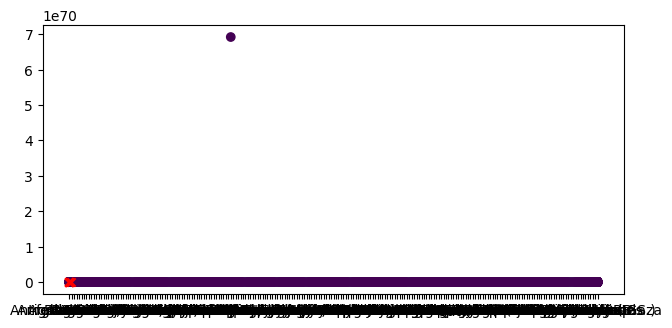

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7.5, 3.5))
# Assuming 'gdp_data' has a column named 'Year' or a similar index
# that represents the x-axis values:
x_values = gdp_data.index  # or gdp_data['Year'] if you have a 'Year' column

# Use x_values and the mean for scatter plot
plt.scatter(x_values, gdp_data.mean(axis=1), c=kmedoids.labels_, cmap='viridis')

plt.scatter(kmedoids.cluster_centers_[:, 0],
            kmedoids.cluster_centers_[:, 1], marker='x', color='red')
plt.show()

In [76]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=66bb0341ed9c45d92e6d2f84e4d362eb01472e67b001b8436398dc0ccdb0cd6f
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [77]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedians import kmedians
from pandas import crosstab

In [ ]:
kmedians_instance = kmedians(X,initial_cluster_centers)
kmedians_instance.process();

clusters = kmedians_instance.get_clusters()
y_kmedians = np.zeros([X.shape[0]])
y_kmedians[clusters[0]]=0
y_kmedians[clusters[1]]=1

C = np.array(kmedians_instance.get_medians())
ax = plt.axes()
ax.grid(visible=True, zorder=1)
ax.scatter(C[:,0],C[:,1],marker='+',c='red',zorder=4);

for i in range(K):
    idx = np.where(y_kmedians==i)
    ax.scatter(X[idx,0],X[idx,1],marker='.',zorder=3,c=cor[i])

plt.axis('equal');
crosstab(y,y_kmedians)